In [64]:
im = mpimg.imread('./plt2.jpg')
r, g, b = rgb_channels(im)

In [65]:
dfftx_r, dffty_r  = fft_diferential_with_gaussian_blur(r, 1, 1)
dfftx_b, dffty_b  = fft_diferential_with_gaussian_blur(b, 1, 1)
dfftx_g, dffty_g  = fft_diferential_with_gaussian_blur(g, 1, 1)

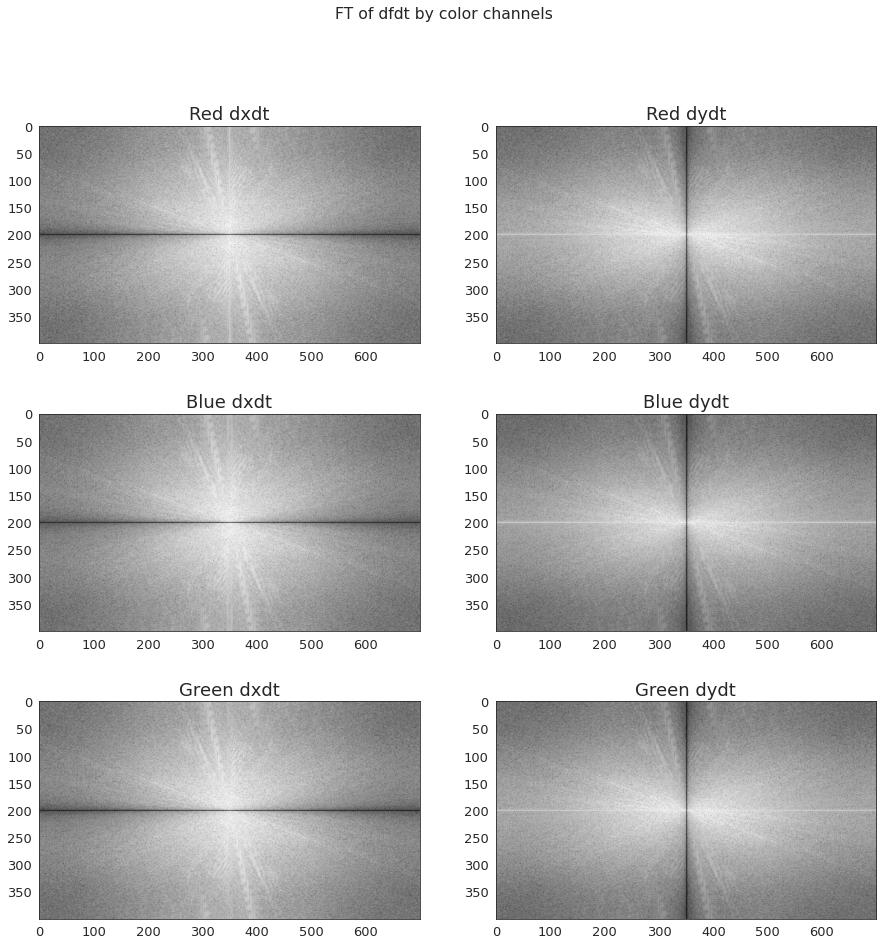

In [66]:
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

fig.suptitle('FT of dfdt by color channels')

colors = ['Red', 'Blue', 'Green']
dfdt = ['dxdt', 'dydt']

for i in range(3):
    for j in range(2):
        axes[i][j].set_title(f'{colors[i]} {dfdt[j]}') 

axes[0][0].imshow(absolute(dfftx_r), cmap='gray')
axes[0][1].imshow(absolute(dffty_r), cmap='gray')

axes[1][0].imshow(absolute(dfftx_b), cmap='gray')
axes[1][1].imshow(absolute(dffty_b), cmap='gray')

axes[2][0].imshow(absolute(dfftx_g), cmap='gray')
axes[2][1].imshow(absolute(dffty_g), cmap='gray')

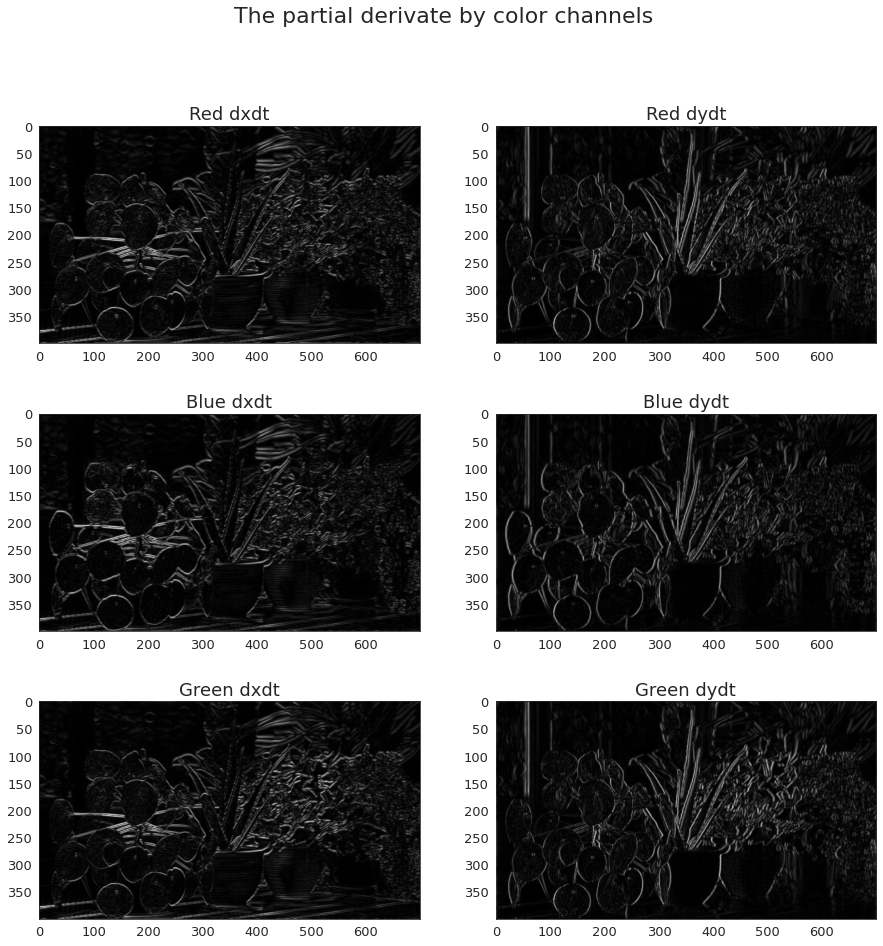

In [67]:
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

fig.suptitle('The partial derivate by color channels', fontsize = 22)

colors = ['Red', 'Blue', 'Green']
dfdt = ['dxdt', 'dydt']

for i in range(3):
    for j in range(2):
        axes[i][j].set_title(f'{colors[i]} {dfdt[j]}') 

axes[0][0].imshow(ifft_im(dfftx_r), cmap='gray')
axes[0][1].imshow(ifft_im(dffty_r), cmap='gray')

axes[1][0].imshow(ifft_im(dfftx_b), cmap='gray')
axes[1][1].imshow(ifft_im(dffty_b), cmap='gray')

axes[2][0].imshow(ifft_im(dfftx_g), cmap='gray')
axes[2][1].imshow(ifft_im(dffty_g), cmap='gray')

In [68]:
mr = mag(dfftx_r, dffty_r)
mb = mag(dfftx_b, dffty_b)
mg = mag(dfftx_g, dffty_g)

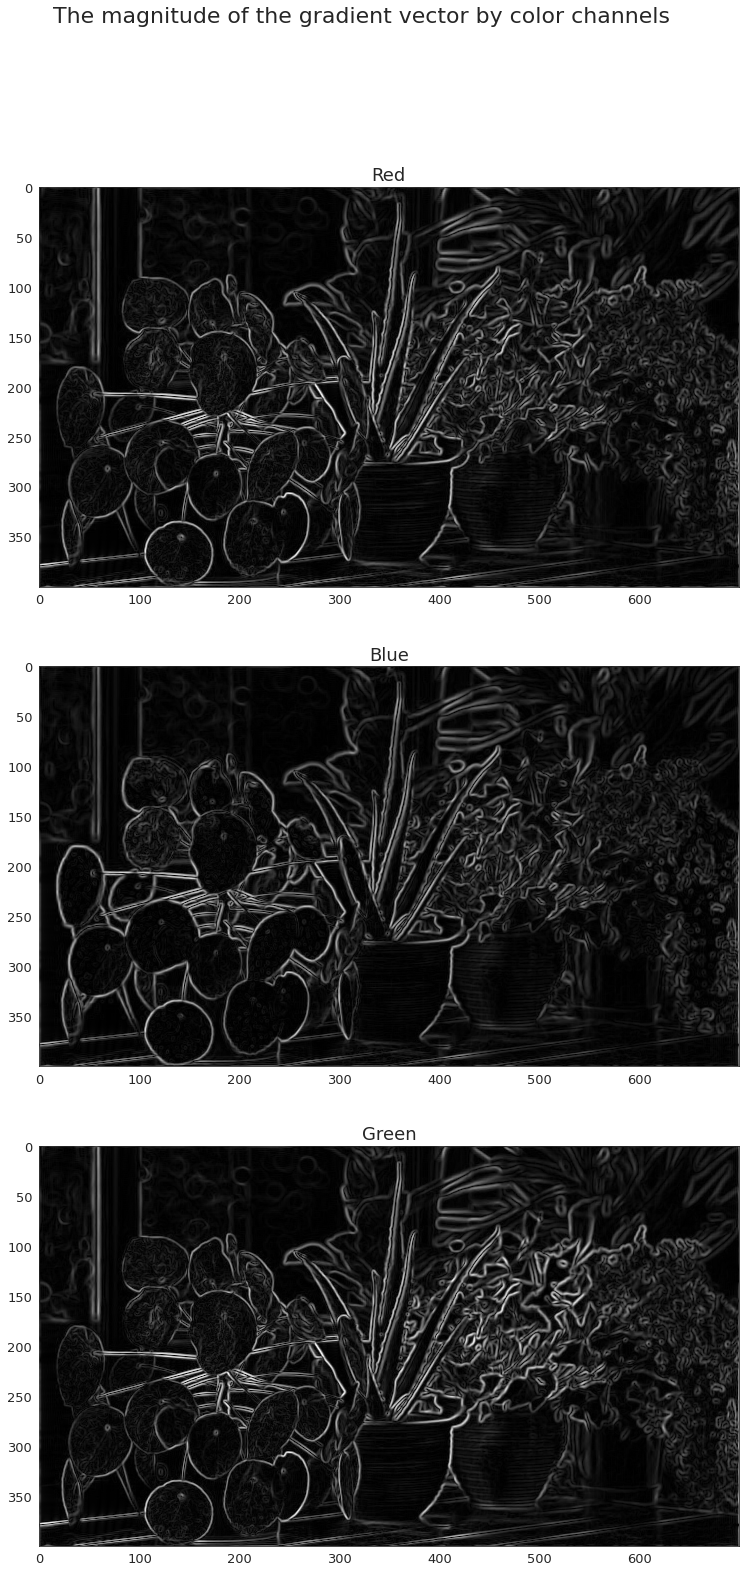

In [69]:
fig, axes = plt.subplots(3, 1, figsize = (30, 25))

fig.suptitle('The magnitude of the gradient vector by color channels', fontsize = 22)

colors = ['Red', 'Blue', 'Green']

for i in range(3):
    axes[i].set_title(f'{colors[i]}') 

axes[0].imshow(mr, cmap='gray')

axes[1].imshow(mb, cmap='gray')

axes[2].imshow(mg, cmap='gray')

<hr></hr>

## **Canny Edge Detection**

<hr></hr>

In [70]:
edges_r = edges_detector(dfftx_r, dffty_r)
edges_b = edges_detector(dfftx_b, dffty_b)
edges_g = edges_detector(dfftx_g, dffty_g)

In [71]:
edg1_r, edg2_r, im_edg_r = split_edges(edges_r, 70, 35)
edg1_b, edg2_b, im_edg_b = split_edges(edges_b, 70, 35)
edg1_g, edg2_g, im_edg_g = split_edges(edges_g, 70, 35)

In [72]:
edg_rf, im_rf = hyst_contour(edg1_r, edg2_r)
edg_bf, im_bf = hyst_contour(edg1_b, edg2_b)
edg_gf, im_gf = hyst_contour(edg1_g, edg2_g)

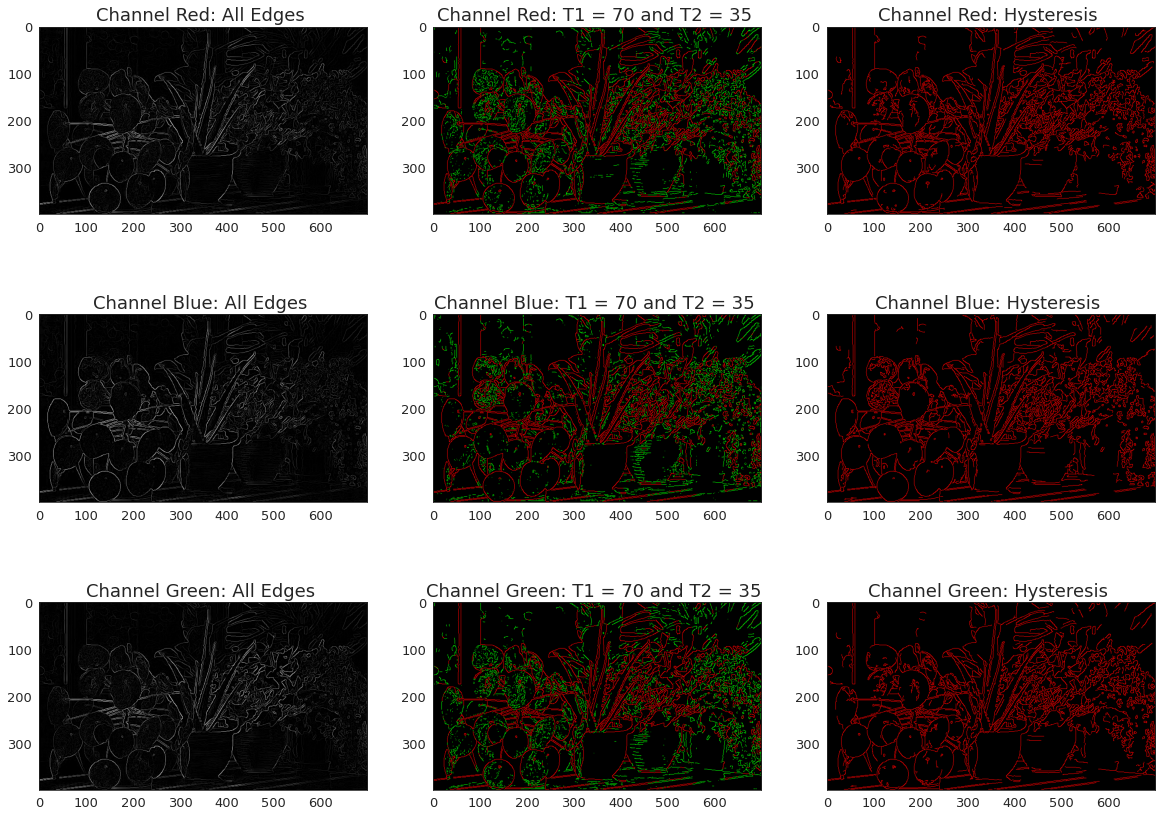

In [73]:
fig, axes = plt.subplots(3, 3, figsize = (20, 15))

colors = ['Red', 'Blue', 'Green']
titles = ['All Edges', 'T1 = 70 and T2 = 35','Hysteresis']

for i in range(3):
    for j in range(3):
        axes[i][j].set_title(f'Channel {colors[i]}: {titles[j]} ') 


axes[0][0].imshow(edges_r, cmap = 'gray')
axes[0][1].imshow(im_edg_r)
axes[0][2].imshow(im_rf)

axes[1][0].imshow(edges_b, cmap = 'gray')
axes[1][1].imshow(im_edg_b)
axes[1][2].imshow(im_bf)

axes[2][0].imshow(edges_g, cmap = 'gray')
axes[2][1].imshow(im_edg_g)
axes[2][2].imshow(im_gf)

In [74]:
emp_edges_r = emphasized_edges(im, edg_rf)
emp_edges_b = emphasized_edges(im, edg_bf)
emp_edges_g = emphasized_edges(im, edg_gf)

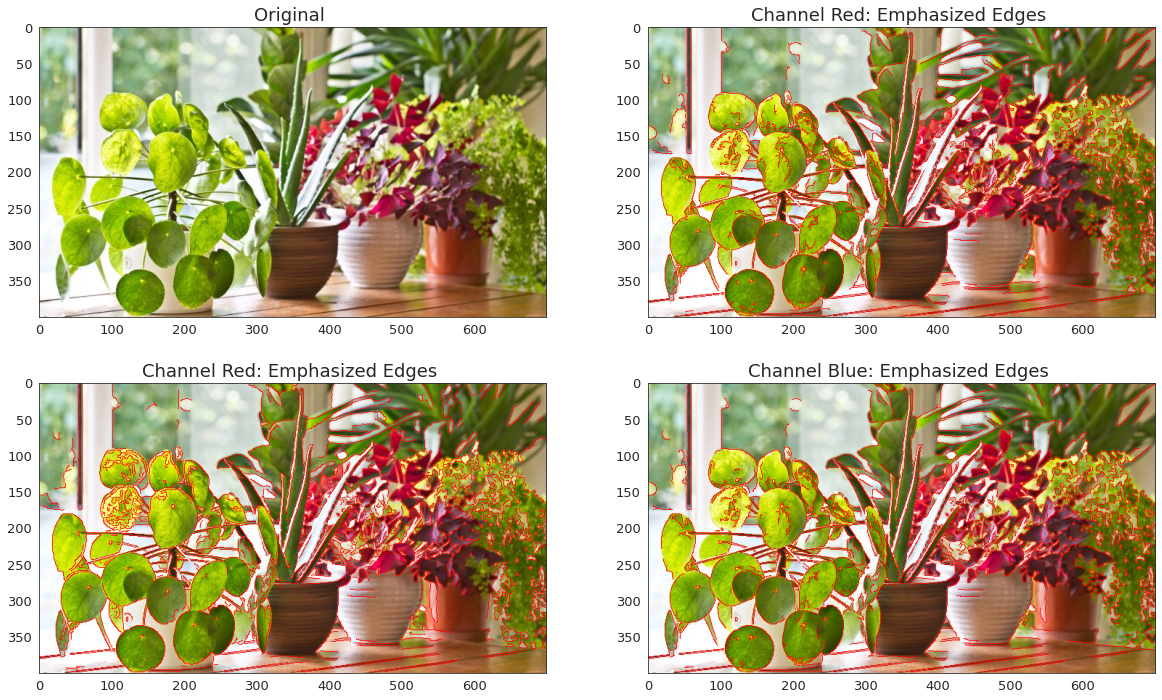

In [75]:
fig, axes = plt.subplots(2, 2, figsize = (20, 12))

titles = ['Original', 'Channel Red: Emphasized Edges', 'Channel Blue: Emphasized Edges', 'Channel Green: Emphasized Edges']

for i in range(2):
    for j in range(2):
        axes[i][j].set_title(f'{titles[i + j]} ') 


axes[0][0].imshow(im)
axes[0][1].imshow(emp_edges_r)
axes[1][0].imshow(emp_edges_b)
axes[1][1].imshow(emp_edges_g)

In [76]:
edges_bl = edges_r + edges_b + edges_g
edg1_bl, edg2_bl, im_edg_bl = split_edges(edges_bl, 70, 35)
edg_blf, im_blf = hyst_contour(edg1_bl, edg2_bl)

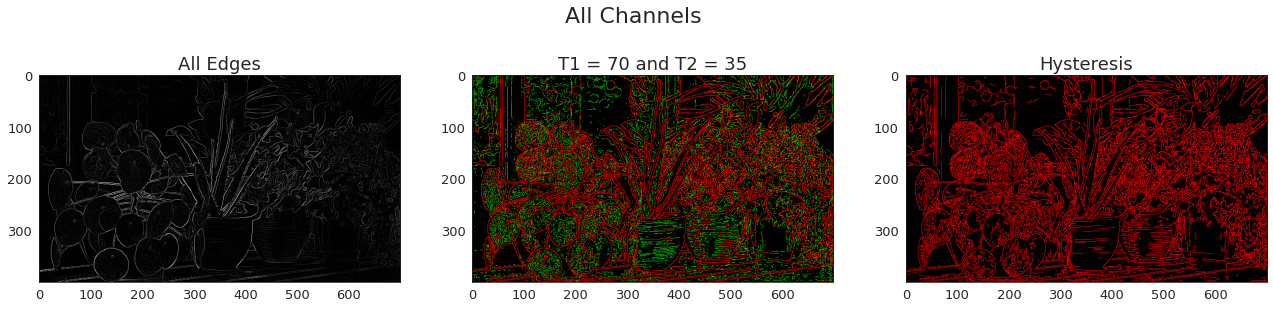

In [77]:
fig, axes = plt.subplots(1, 3, figsize = (22, 5))

titles = ['All Edges', 'T1 = 70 and T2 = 35','Hysteresis']
fig.suptitle('All Channels', fontsize = 22)
for i in range(3):
    axes[i].set_title(titles[i]) 

axes[0].imshow(edges_bl, cmap = 'gray')
axes[1].imshow(im_edg_bl)
axes[2].imshow(im_blf)

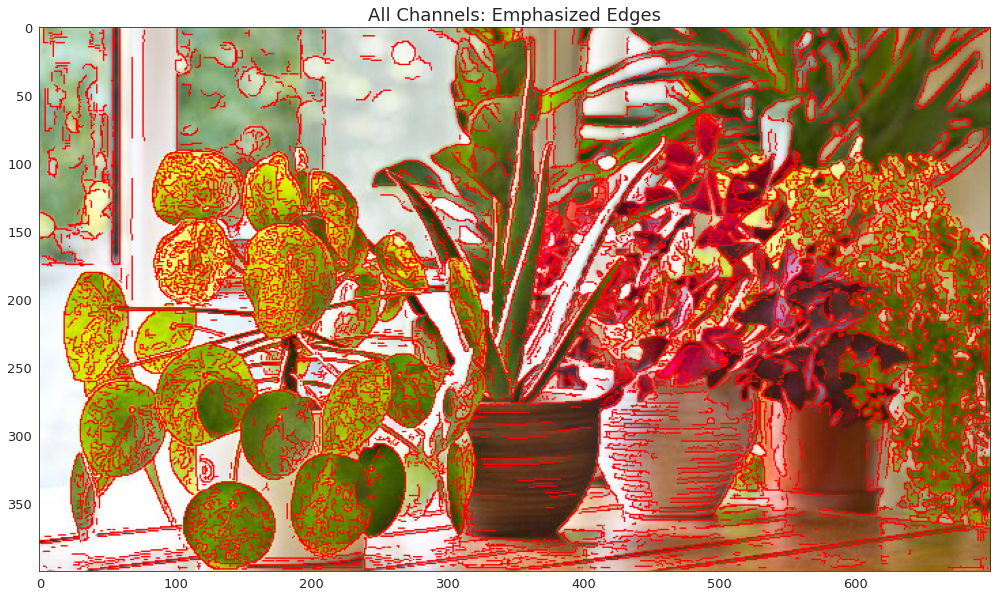

In [78]:
fig = plt.figure(figsize = (20, 10))

plt.title('All Channels: Emphasized Edges')
plt.imshow(emphasized_edges(im, edg_blf))

<hr></hr>

### **Functions**

<hr></hr>

In [7]:
def simetric_gaussian(nx, ny, s):
    
    eqg = lambda x, y, s: np.exp(-0.5*(x**2 + y**2)/s**2)
    
    nrx = int(np.floor(nx/2))
    nry = int(np.floor(ny/2))
    
    nlx = -(nx - nrx - 1)
    nly = -(ny - nry - 1)
    
    g = np.zeros((nx, ny))
    
    for i in range(nrx):
        for j in range(nry):
            g[i, j] = eqg(i, j, s)
    
    for i in range(nlx-1, -1):
        for j in range(nly-1, -1):
            g[i + nx + 1, j + ny + 1] = eqg(i, j, s)
    
    for i in range(0, nrx):
        for j in range(nly -1 , -1):
            g[i, j + ny + 1] = eqg(i, j, s)
    
    for i in range(nlx - 1, -1):
        for j in range(nry):
            g[i + nx + 1, j] = eqg(i, j, s)
    return g    

In [19]:
def rgb_channels(im):
    
    r = im[:, :, 0]
    b = im[:, :, 1]
    g = im[:, :, 2]
    
    return r, b, g

In [9]:
def fft_im(im):
    
    fft = np.fft.fft2(im) # forier transform of the image 
    
    Lx, Ly = fft.shape # the number of samples in the space
    
    kx = (2*np.pi/Lx)*np.arange(-Lx/2, Lx/2) # the axe of centred frequency sample in x
    ky = (2*np.pi/Ly)*np.arange(-Ly/2, Ly/2) # the axe of centred frequency sample in y
    
    # To align the frequenys axes with the fft no centred
    kx = np.fft.fftshift(kx) 
    ky = np.fft.fftshift(ky)
    
    return fft, kx, ky

In [10]:
def ifft_im(im, abso = True, shift = False):
    
    aux = im
    
    if shift:
        aux = np.fft.fftshift(im)
    
    ifft = np.fft.ifft2(aux)
    
    if abso:
        return np.absolute(ifft)
    
    else:
        return np.real(ifft), np.imag(ifft)

In [11]:
def absolute(im, log = True, shift = True):
    
    fft = im
    
    if shift:    
        fft = np.fft.fftshift(fft)
    
    fft = np.absolute(fft)

    if log:
        fft = np.log(1 + fft)
    
    return fft

In [12]:
def mag(x, y):
    return np.real(np.sqrt(np.fft.ifft2(x)**2+np.fft.ifft2(y)**2))

In [13]:
def fft_diferential_with_gaussian_blur(im, order = 1, s = 1):
    
    fft, kx, ky = fft_im(im)
    Lx, Ly = len(kx), len(ky)
    
    gaussian = simetric_gaussian(Lx, Ly, s)
    fft_gs = np.fft.fft2(gaussian)
    
    dfftx, dffty = [], []
    
    for v in range(Ly):
        dfftx.append(kx*fft[:,v]*fft_gs[:,v]*(1j))

    for u in range(Lx):
        dffty.append(ky*fft[u,:]*fft_gs[u,:]*(1j))    
    
    dfftx = np.array(dfftx).T
    dffty = np.array(dffty)
    
    return dfftx, dffty

In [14]:
def edges_detector(dfftx, dffty):
    
    edg = np.zeros(dfftx.shape)
    
    imx, _ = ifft_im(dfftx, False)
    imy, _ = ifft_im(dffty, False)
    
    mg = mag(dfftx, dffty)
    
    for i in range(1, edg.shape[0] - 1):
        for j in range(1, edg.shape[1] - 1):

            m = imy[i][j]/imx[i][j]

            if np.absolute(m) < 1:

                j1 = int(np.round(j - m))
                j2 = int(np.round(j + m))

                i1 = i - 1
                i2 = i + 1

            else:

                i1 = int(np.round(i - 1/m))
                i2 = int(np.round(i + 1/m))

                j1 = j - 1
                j2 = j + 1

            if mg[i1][j1] < mg[i][j] and mg[i2][j2] < mg[i][j]:

                edg[i][j] = mg[i][j] 
    return edg

In [15]:
def split_edges(edges, T1, T2, colors = ([255, 0, 0], [0, 255, 0]), background=[0, 0, 0]):
        
    aux1 = edges < T1
    aux2 = edges >= T2
    
    mask1 = edges >= T1
    mask2 = aux1 == aux2
    
    Lx, Ly = edges.shape
    
    im = np.array([[background]*Ly]*Lx)
    
    im[mask1] = colors[0]
    im[mask2] = colors[1]
    
    return mask1, mask2, im

In [16]:
def hyst_contour(edg1, edg2, color = [255, 0, 0], background=[0, 0, 0]):
    
    edg1x, edg1y = [], []
    
    Lx, Ly = edg1.shape
    
    can = edg1
    
    for i in range(Lx):
        for j in range(Ly):
            if edg1[i, j]:
                edg1x.append(i)
                edg1y.append(j)
    
    while len(edg1x) > 0:
    
        next_x, next_y = [], []

        for k in range(len(edg1x)):
            for ii in range(-1, 2):
                for jj in range(-1, 2):
                    if edg2[edg1x[k] + ii][edg1y[k] + jj] != 0:

                        next_x.append(edg1x[k] + ii)
                        next_y.append(edg1y[k] + jj)

                        can[edg1x[k] + ii][edg1y[k] + jj] = 255
                        edg2[edg1x[k] + ii][edg1y[k] + jj] = False

        edg1x = next_x
        edg1y = next_y
    
    im = np.array([[background]*Ly]*Lx)
    im[can] = color
    
    return can, im

In [17]:
def emphasized_edges(img, mask, color = [255, 0, 0]):
    
    im = np.copy(img)
    im[mask] = color
    
    return im

<hr></hr>

### **Imports**

<hr></hr>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib import cm
from scipy import signal
from scipy import misc
from scipy import sparse
import seaborn as sns
from scipy import signal

<hr></hr>

### **6. Globally Setting**

<hr></hr>

In [3]:
%matplotlib inline

In [4]:
sns.set_style('white') # darkgrid, white grid, dark, white and ticks

In [5]:
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)  
plt.rc('font', size=13)          # controls default text sizes

In [6]:
sns.color_palette("husl", 20) # color palette exemple

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9579148533500138, 0.358831186992106, 0.9474115985773391),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9651791951613143, 0.4212549802305815, 0.6785112441648762)]